<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> BVP linear and nonlinear with Finite Difference and the Shooting Method</h2>
    <h2> <a href="#acknowledgements"> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 1.01</h2>
</center>

<div id='toc' />

## Table of Contents
* [Example 1](#example1)
* [Example 2](#example2)
* [Example 3 and its solution](#example3s)
* [Solution Example 1](#example1s)
* [Solution Example 2](#example2s)
* [Acknowledgements](#acknowledgements)

# No debe utilizar bibliotecas adicionales.

In [1]:
import numpy as np
import scipy as sp
# To solve IVP, notice this is different that odeint!
from scipy.integrate import solve_ivp
# To integrate use one of the followings:
from scipy.integrate import quad, quadrature, trapezoid, simpson
# For least-square problems
from scipy.sparse.linalg import lsqr
from scipy.linalg import qr
# For interpolation
from scipy.interpolate import BarycentricInterpolator
# The wonderful GMRes
from scipy.sparse.linalg import gmres
# The wonderful**2 Newton method coupled to GMRes by a matrix-free call!
from scipy.optimize import newton_krylov
from scipy.optimize import root
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt
from ipywidgets import interact
from colorama import Fore, Back, Style
# https://pypi.org/project/colorama/
# Fore: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
# Back: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
# Style: DIM, NORMAL, BRIGHT, RESET_ALL
textBold = lambda x: Style.BRIGHT+x+Style.RESET_ALL
textBoldH = lambda x: Style.BRIGHT+Back.YELLOW+x+Style.RESET_ALL

# Warning:
The following numerical solutions give the 'core' to produce the required answers for the questions presented, you should still work on how to put the components together to generate the particular answers requested.

<div id='example1' />

# Example 1
[Back to toc](#toc)

Considere el siguiente BVP:
\begin{align*}
    a\,y''(x)+b(x)\,y'(x)+c(x)\,y(x) & = f(x), \quad \text{para $x\in]0,1[$}\\
    a\,(y(0) - y_0)& = 0,\\
    y(1)    & = y_1,
\end{align*}
donde $a\in\mathbb{R}$, $b(x)>0$, y $x\in[0,1]$
1. Construya un _solver_ para el problema anterior considerando **todos** los posibles casos utilizando diferencias finitas.

2. Construya un _solver_ para el problema anterior considerando **todos** los posibles casos utilizando el método del disparo.

_Hint: Does you solvers really consider all the cases? Even when $a=0$?_

3. Obtenga con cada _solver_: $\int_0^1 y(x)\,dx$, $\int_0^1 y'(x)\,dx$, y $\int_0^1 y''(x)\,dx$ usando los siguientes algoritmos:
    1. Trapecio
    2. Punto Medio
    3. Simpson
    4. Cuadratura Gaussiana
    5. _Algebraicamente_

_Hint2: Take a look to the additional parameters requiered in the definitions of the functions below._

In [2]:
'''
input:
a         : (double) coeficiente 'a'
b         : (callable) función b(x)>0
c         : (callable) función c(x)
f         : (callable) función f(x)
y0        : (double) y_0
y1        : (double) y_1
N         : (integer) número de puntos en la discretización espacial de x

output:
xi        : (ndarray) discretización equiespaciada de N puntos x
yi        : (ndarray) aproximación numérica de y(x) en los puntos xi
'''
def find_y_FD(a, b, c, f, y0, y1, N):
    # Your own code.
    return xi, yi

'''
input:
a         : (double) coeficiente 'a'
b         : (callable) función b(x)>0
c         : (callable) función c(x)
f         : (callable) función f(x)
y0        : (double) y_0
y1        : (double) y_1
N         : (integer) número de puntos en la discretización espacial de x

output:
xi        : (ndarray) discretización equiespaciada de N puntos x
yi        : (ndarray) aproximación numérica de y(x) en los puntos xi
'''
def find_y_SM(a, b, c, f, y0, y1, N):
    # Your own code.
    return xi, yi

<div id='example2' />

# Example 2
[Back to toc](#toc)

Considere el siguiente BVP:
\begin{align*}
    y''(x)+3\,\exp(y(x)) & = 0, \quad \text{para $x \in]0,1[$}\\
    y(0) &= 0,\\
    y(1) &= 0,\\
\end{align*}
donde $x\in[0,1]$. Note que $y(x)=0$ no es una solución.
1. Construya un algoritmo basado en diferencias finitas que obtenga la aproximación numérica $y(x)$ considerando como _initial guess_ $y_0(x)$. Utilice el método de Newton con GMRes para resolver el sistema de ecuaciones no-lineales asociado o el módulo _newton_krylov_ de _scipy_, en este último caso no es necesario implementar build_jacobian_matrix_FD.
2. Construya un algoritmo basado en el método del disparo que obtenga la aproximación numérica $y(x)$ considerando como _initial guess_ $y_0(x)$.
3. Resuelva con el algoritmo basado en diferencias finitas el BVP con $y_0(x)=0$ con N=20.
4. Resuelva con el algoritmo basado en el método del disparo el BVP con $y_0(x)=0$ con N=20.
5. ¿Obtiene aproximadamente la misma aproximación numérica en la pregunta 3 y 4?
6. Considere la siguiente familia de _initial guesses_ $y_0^{[m]}(x)=m\,(x-x^2)$, para $m\in\{-10,-9,\dots,10\}$ y N=20.
    1. Resuelva con el algoritmo basado en diferencias finitas el BVP con cada $y_0^{[m]}(x)$.
    2. Resuelva con el algoritmo basado en el método del disparo el BVP con cada $y_0^{[m]}(x)$.
    3. ¿Se obtinen las mismas soluciones en cada caso?
    4. ¿Cuantas soluciones distintas se obtienen?
    
_Hint: Take a look to the additional parameters requiered in the definitions of the functions below._

In [3]:
'''
input:
yi        : (ndarray) vector donde se evalua la matrix Jacobiana
v         : (ndarray) vector que será multiplicado por la matriz Jacobiana

output:
Jv        : (ndarray) matrix Jacobiana evaluada en yi y multiplicada por v, es decir np.dot(J,v).
                    Esto es muy útil para acoplarlo con GMRes.
'''
def build_jacobian_matrix_FD(yj):
    # Your own code.
    return Jv

'''
input:
y0        : (callable) initial guess y0(x)
N         : (integer) número de puntos en la discretización espacial de x

output:
xi        : (ndarray) discretización equiespaciada de N puntos x
yi        : (ndarray) aproximación numérica de y(x) en los puntos xi
'''
def solve_nonlinear_ode_FD(y0, N):
    # Your own code.
    return xi, yi

'''
input:
y0        : (callable) initial guess y0(x)
N         : (integer) número de puntos en la discretización espacial de x

output:
xi        : (ndarray) discretización equiespaciada de N puntos x
yi        : (ndarray) aproximación numérica de y(x) en los puntos xi
'''
def solve_nonlinear_ode_SM(y0, N):
    # Your own code.
    return xi, yi

<div id='example3s' />

# Example 3
[Back to toc](#toc)

Considere que tiene la siguiente colección de datos:
\begin{align*}
    \{(t_1, y_1),(t_2,y_2),\dots,(t_n,y_n)\},
\end{align*}
donde sabemos que $0 \leq t_i \leq 100$ para $i\in\{1,2,\dots,n\}$.
Una aproximación tradicional de mínimos cuadrados requeriría proponer una función $y(t)$, por ejemplo lineal $a+b\,t$, para minimizar el error cuadrático, $E=\sum_{i=1}^n \left(y(t_i)-y_i\right)^2$.
Esto nos entregaría los coeficientes de la estructura propuesta para $y(t)$.
La mayor desventaja de este procedimiento es que tenemos que conocer _a priori_ la estructura algebraica de $y(t)$.
Una alternativa sería construir numéricamente una aproximación de $y(t)$, por ejemplo reemplazando la minimización por un problema de valor inicial, para lo cual se propone el siguiente IVP,
\begin{align*}
    \dot{y}(t) &= \gamma\,\tanh\left(\dfrac{\displaystyle\sum_{t_i\in[t-T,t]} (y_i-y(t))}{\gamma}\right),\\
    y(0)       &= y_1,
\end{align*}
donde $\gamma=1$.
1. Implemente el solver. 
2. ¿Se suaviza la data?
3. ¿Cómo depende la aproximación en función de $T$?
4. ¿Cómo depende la aproximación en función de $\gamma$?

Nota: Si el conjunto $t_i\in[t-T,t]$ es vacio, entonces el lado derecho de $\dot{y}(t)$ se considera que es $0$.

In [4]:
'''
input:
N         : (integer) número de puntos en la discretización espacial del intervalo [0,100]
Tw        : (double)  ventana deslizante utilizada en la sumatoria [t-Tw,t]
gamma     : (double)  coeficiente usado en conjunto con tanh
Ti        : (double) tiempo inicial de simulación
Tf        : (double) tiempo final de simulación
ti        : (ndarray) ti data de entrada
yi        : (ndarray) yi data de entrada

output:
t_out        : (ndarray) discretización equiespaciada de N puntos t
y_out        : (ndarray) aproximación numérica de y(t) en los puntos ti
'''
def solve_almost_LS_IVP(N,Tw,gamma,Ti,Tf,ti,yi):
    # Your own code.
    return t_out, y_out

# Consider the following data
np.random.seed(0)
Ndata    = 1000
ti       = np.linspace(0,100,Ndata)
yi       = 0.2*np.cos(2*ti)+np.sin(0.1*ti)+0.1*np.random.rand(Ndata)

In [5]:
'''
input:
N         : (integer) número de puntos en la discretización espacial del intervalo [0,100]
Tw        : (double)  ventana deslizante utilizada en la sumatoria [t-Tw,t]
gamma     : (double)  coeficiente usado en conjunto con tanh
Ti        : (double) tiempo inicial de simulación
Tf        : (double) tiempo final de simulación
ti        : (ndarray) ti data de entrada
yi        : (ndarray) yi data de entrada

output:
t_out        : (ndarray) discretización equiespaciada de N puntos t
y_out        : (ndarray) aproximación numérica de y(t) en los puntos ti
'''
def solve_almost_LS_IVP(N,Tw,gamma,Ti,Tf,ti,yi):
    def my_f(t,y):
        ysample = yi[np.logical_and((t-Tw)<ti,ti<t)]
        if len(ysample)>=1:
            return gamma*np.tanh((np.sum(ysample)-len(ysample)*y)/gamma)
        else:
            return 0
    sol = solve_ivp(my_f,(Ti,Tf),(yi[0],),t_eval=np.linspace(Ti,Tf,N))
    t_out = sol.t
    y_out = sol.y[0]
    return t_out, y_out

def show_output_LS_IVP(Tw=3,gamma=1):
    N        = 10000
    Ti       = 0
    Tf       = 120
    t_out, y_out = solve_almost_LS_IVP(N,Tw,gamma,Ti,Tf,ti,yi)

    plt.figure(figsize=(16,8))
    plt.plot(ti,yi,'.',label=r'$y_i$')
    plt.plot(t_out,y_out,'r-', label=r'$y(t)$')
    plt.xlabel('t')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()
    
print(textBold("Suggestion: "),textBoldH("Evaluate the approximation using small values of 'Tw' and 'gamma'."))
interact(show_output_LS_IVP,Tw=(0.1,100,0.1), gamma=(0.01,10,0.01))

Suggestion:  Evaluate the approximation using small values of 'Tw' and 'gamma'.


interactive(children=(FloatSlider(value=3.0, description='Tw', min=0.1), FloatSlider(value=1.0, description='g…

<function __main__.show_output_LS_IVP(Tw=3, gamma=1)>

<div id='example1s' />

# Solution Example 1
[Back to toc](#toc)

Considere el siguiente BVP:
\begin{align*}
    a\,y''(x)+b(x)\,y'(x)+c(x)\,y(x) & = f(x), \quad \text{para $x\in]0,1[$}\\
    a\,(y(0) - y_0)& = 0,\\
    y(1)    & = y_1,
\end{align*}
donde $a\in\mathbb{R}$, $b(x)>0$, y $x\in[0,1]$

## Caso $a\neq0$

### FD:

Considere el siguiente BVP:
\begin{align*}
    a\,y''(x)+b(x)\,y'(x)+c(x)\,y(x) & = f(x), \quad \text{para $x\in]0,1[$}\\
    a\,(y(0) - y_0)& = 0,\\
    y(1)    & = y_1,
\end{align*}
donde $a\in\mathbb{R}$, $b(x)>0$, y $x\in[0,1]$

Answer: Consider that $x_i = \frac{i}{N-1}$ for $i\,\{0,1,\dots,N-1\}$, and $y(x_i) \approx w_i$, where we know that $w_{0}=y_0$ and $w_{N-1}=y_1$.
For simplicity we will consider $\mathbf{w}=[w_1,w_2,\dots,w_{N-2}]$.
The finite diference discretizations that we will use are the followings:
\begin{align*}
    y''(x_i) &\approx \dfrac{w_{i+1}-2\,w_i+w_{i-1}}{h^2},\\
    y'(x_i)  &\approx \dfrac{w_{i+1}-w_{i-1}}{2\,h}.
\end{align*}
Thus, the discrete version of the ode at $x_i$ will be the following:
\begin{align*}
    a\,y''(x_i)      &\approx a\,\dfrac{w_{i+1}-2\,w_i+w_{i-1}}{h^2},\\
    b(x_i)\,y'(x_i)  &\approx b(x_i)\,\dfrac{w_{i+1}-w_{i-1}}{2\,h},\\
    c(x_i)\,y(x_i)   &\approx c(x_i)\,w_i,\\
    f(x_i)           &\approx f(x_i).
\end{align*}
By using the unknowns vector $\mathbf{w}$ and the know vector $\mathbf{x}=[x_1,x_2,\dots,x_{N-2}]$ we can define the following matrices:
\begin{align*}
    D_2 &= 
    \begin{bmatrix}
        -2 &  1 & 0 & 0 & 0 & 0 & 0 \\
         1 & -2 & 1 & 0 & 0 & 0 & 0 \\
         0 &  1 & -2 & 1 & 0 & 0 & 0 \\
         \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots \\
         0 &  0 & 0 & 0 & 1 & -2 & 1 \\
         0 &  0 & 0 & 0 & 0 & 1 & -2 \\
    \end{bmatrix},\\
    D  &= 
    \begin{bmatrix}
         0 & 1 & 0 & 0 & 0 & 0 & 0 \\
         -1 & 0 & 1 & 0 & 0 & 0 & 0 \\
         0 &  -1 & 0 & 1 & 0 & 0 & 0 \\
         \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots \\
         0 &  0 & 0 & 0 & -1 & 0 & 1 \\
         0 &  0 & 0 & 0 & 0 & -1 & 0 \\
    \end{bmatrix}.\\
\end{align*}

In [6]:
# This function builds the h-less differentiation matrices for
# the approximation of the first and second derivatives.
# h-less means that it still needs to add the corresponding
# h coefficient in the approximation.
def build_D_D2(M):
    # First derivative - Central difference differentiation matrix
    D  = toeplitz(np.append(np.array([0, -1.]), np.zeros(M-2)), 
                     np.append(np.array([0, 1.]), np.zeros(M-2)))
    # Second derivative - differentiation matrix
    D2 = toeplitz(np.append(np.array([-2, 1.]), np.zeros(M-2)))
    return D, D2
D , D2 = build_D_D2(5)
print('D: \n', D)
print('D2: \n', D2)

D: 
 [[ 0.  1.  0.  0.  0.]
 [-1.  0.  1.  0.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0.  0. -1.  0.  1.]
 [ 0.  0.  0. -1.  0.]]
D2: 
 [[-2.  1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -2.]]


The discrete equation at $x_i$ is the following:
\begin{equation*}
    \dfrac{a}{h^2} \left(w_{i+1}-2\,w_i+w_{i-1}\right)
    +
    \dfrac{b(x_i)}{2\,h} \left(w_{i+1}-w_{i-1}\right)
    +
    c(x_i)\,w_i
    =
    f(x_i).
\end{equation*}
There are two special cases, for $x_1$ and $x_{N-2}$, they generate the following equations:
\begin{align*}
    \dfrac{a}{h^2} \left(w_{2}-2\,w_1+w_0\right)
    +
    \dfrac{b(x_1)}{2\,h} \left(w_{2}-w_{0}\right)
    +
    c(x_1)\,w_1
    &=
    f(x_1),\\
    \dfrac{a}{h^2} \left(w_{N-1}-2\,w_{N-2}+w_{N-3}\right)
    +
    \dfrac{b(x_{N-2})}{2\,h} \left(w_{N-1}-w_{N-3}\right)
    +
    c(x_{N-2})\,w_{N-2}
    &=
    f(x_{N-2}).
\end{align*}
But, since we know $w_0$ and $w_{N-1}$, they become,
\begin{align*}
    \dfrac{a}{h^2} \left(w_{2}-2\,w_1\right)
    +
    \dfrac{b(x_1)}{2\,h} w_{2}
    +
    c(x_1)\,w_1
    &=
    f(x_1)-\dfrac{a}{h^2} w_0+\dfrac{b(x_1)}{2\,h}\,w_0,\\
    \dfrac{a}{h^2} \left(-2\,w_{N-2}+w_{N-3}\right)
    +
    \dfrac{b(x_{N-2})}{2\,h} \left(-w_{N-3}\right)
    +
    c(x_{N-2})\,w_{N-2}
    &=
    f(x_{N-2})-\dfrac{a}{h^2}\,w_{N-1}-\dfrac{b(x_{N-2})}{2\,h}\,w_{N-1}.
\end{align*}
This analysis allows us to write the discrete equation in the following way for the unknown vector $\mathbf{w}=[w_1,w_2,\dots,w_{N-2}]$ and $\mathbf{x}=[x_1,x_2,\dots,x_{N-2}]$:
\begin{equation*}
    \dfrac{a}{h^2}\,D_2\,\mathbf{w}
    +
    \dfrac{1}{2\,h}\,\text{diag}(b(\mathbf{x}))\,D\,\mathbf{w}
    +
    \text{diag}(c(\mathbf{x}))\,\mathbf{w}
    =
    \begin{bmatrix}
        f(x_1)-\dfrac{a}{h^2} w_0+\dfrac{b(x_1)}{2\,h}\,w_0\\
        f(x_2)\\
        \vdots\\
        f(x_{N-3})\\
        f(x_{N-2})-\dfrac{a}{h^2}\,w_{N-1}-\dfrac{b(x_{N-2})}{2\,h}\,w_{N-1}
    \end{bmatrix},
\end{equation*}
but since $w_0=y_0$ and $w_{N-1}=y_1$ we get,
\begin{align*}
    \dfrac{a}{h^2}\,D_2\,\mathbf{w}
    +
    \dfrac{1}{2\,h}\,\text{diag}(b(\mathbf{x}))\,D\,\mathbf{w}
    +
    \text{diag}(c(\mathbf{x}))\,\mathbf{w}
    &=
    \begin{bmatrix}
        f(x_1)-\dfrac{a}{h^2} y_0+\dfrac{b(x_1)}{2\,h}\,y_0\\
        f(x_2)\\
        \vdots\\
        f(x_{N-3})\\
        f(x_{N-2})-\dfrac{a}{h^2}\,y_1-\dfrac{b(x_{N-2})}{2\,h}\,y_1
    \end{bmatrix}\\
    &= \mathbf{b}_N.
\end{align*}
Factoring out the unknown vector $\mathbf{w}$ we obtain,
\begin{align*}
    \underbrace{\left(\dfrac{a}{h^2}\,D_2
    +
    \dfrac{1}{2\,h}\,\text{diag}(b(\mathbf{x}))\,D
    +
    \text{diag}(c(\mathbf{x}))\right)}_{\displaystyle{A_N}}\,\mathbf{w}
    &=\mathbf{b}_N.
\end{align*}
Thus, we only need to solve now the linear system of equations $A_N\,\mathbf{w}=\mathbf{b}$ and we are done!
Notice that the sub-index in $A_N$ is just to indicate we have a discretization with $N$ points.

**Notice that we moved from the discrete equations 
$\dfrac{a}{h^2} \left(w_{i+1}-2\,w_i+w_{i-1}\right)+
    \dfrac{b(x_i)}{2\,h} \left(w_{i+1}-w_{i-1}\right)
    +
    c(x_i)\,w_i
    =
    f(x_i)$  to the matrix equations $\dfrac{a}{h^2}\,D_2\,\mathbf{w}
    +
    \dfrac{1}{2\,h}\,\text{diag}(b(\mathbf{x}))\,D\,\mathbf{w}
    +
    \text{diag}(c(\mathbf{x}))\,\mathbf{w}
    =\mathbf{b}_N$, however it is recommended to perform this step, at least for an small problem, manually so it can be understood better. Thus we encourage to do this, for instance for $N=7$.**

In [7]:
# Data definition
N=100
a = 1
b = lambda x: 10+x
c = lambda x: -10+x
f = lambda x: 1+20*np.sin(10*x)
x = np.linspace(0,1,N)
h = 1/(N-1)
y0 = 0
y1 = 1

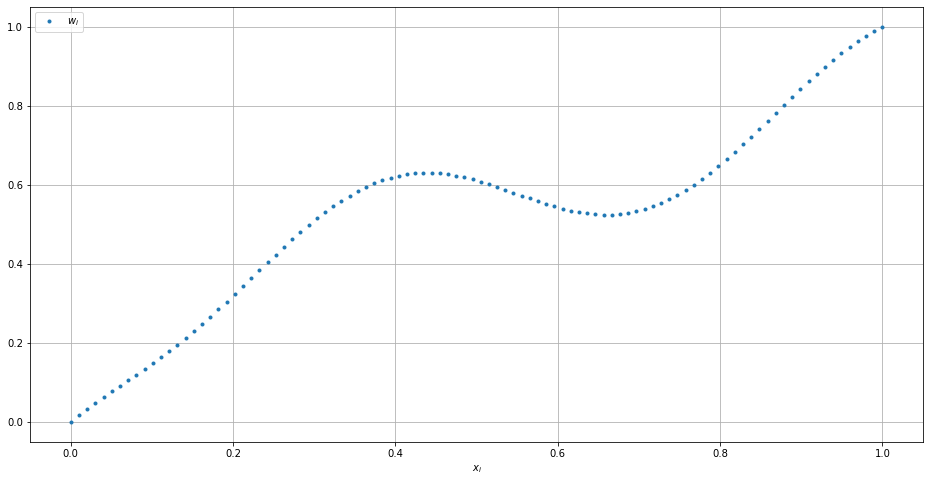

In [8]:
def build_A_and_b(a,b,c,f,h,x,y0,y1,N):
    D, D2 = build_D_D2(N-2)
    x_interior = x[1:-1]
    A_N=(a/(h**2))*D2+(1/(2*h))*np.dot(np.diag(b(x_interior)),D)+np.diag(c(x_interior))
    b_N = f(x_interior)
    b_N[0] = b_N[0]-(a/(h**2))*y0+(b(x_interior[0])/(2*h))*y0
    b_N[-1] = b_N[-1]-(a/(h**2))*y1-(b(x_interior[-1])/(2*h))*y1
    return A_N, b_N

A_N, b_N = build_A_and_b(a,b,c,f,h,x,y0,y1,N)
w = np.linalg.solve(A_N,b_N)
w = np.append(y0,w)
w = np.append(w,y1)

plt.figure(figsize=(16,8))
plt.plot(x,w,'.',label=r'$w_i$')
plt.xlabel(r'$x_i$')
plt.grid(True)
plt.legend(loc='best')
plt.show()

### SM

Considere el siguiente BVP:
\begin{align*}
    a\,y''(x)+b(x)\,y'(x)+c(x)\,y(x) & = f(x), \quad \text{para $x\in]0,1[$}\\
    a\,(y(0) - y_0)& = 0,\\
    y(1)    & = y_1,
\end{align*}
donde $a\in\mathbb{R}$, $b(x)>0$, y $x\in[0,1]$

We first need to rewrite the BVP as a dynamical system and consider $x\rightarrow t$:
\begin{align*}
    w_1(t) &= y(t),\\
    w_2(t) &= y'(t),\\
\end{align*}
so,
\begin{align*}
    \dot{w}_1 &= y'(t) = w_2,\\
    \dot{w}_2(t) &= y''(t)\\
                 &= \dfrac{1}{a}\left(f(t) - b(t)\,w_2-c(t)\,w_1\right),\\
    w_1(0)   &= y_0,\\
    w_2(0)   &= \alpha.
\end{align*}

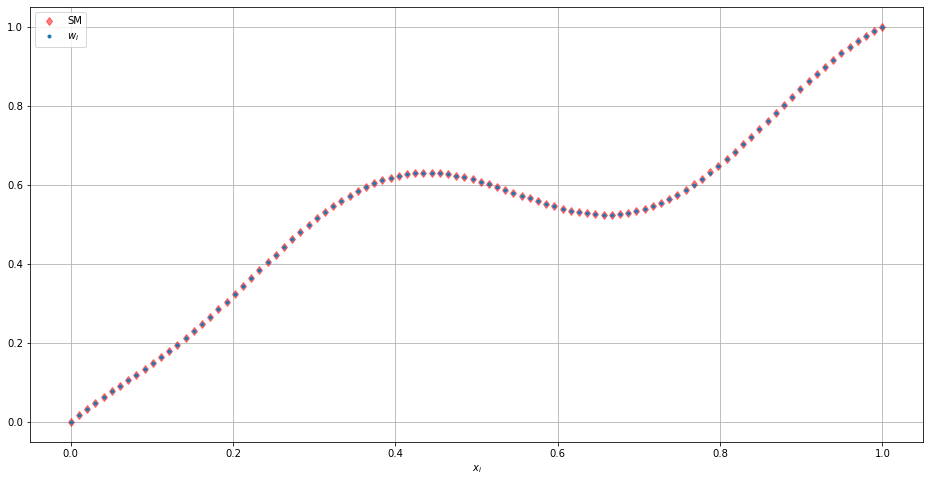

In [9]:
# RHS of dynamical system
def my_f1(t,w,a,b,c,f):
    w1 = w[0]
    w2 = w[1]
    w1dot = w2
    w2dot = (f(t)-b(t)*w2-c(t)*w1)/a
    return np.array([w1dot,w2dot])

# Function to be used to apply the Shooting Method
def F_SM_1(alpha,a,b,c,f,y0,y1,N):
    t = np.linspace(0,1,N)
    initial_condition = np.zeros(2)
    initial_condition[0] = y0
    initial_condition[1] = alpha
    sol = solve_ivp(my_f1,(0,1),initial_condition,t_eval=t,args=(a,b,c,f))
    return sol.y[0,-1]-y1

F_root_1 = lambda alpha: F_SM_1(alpha,a,b,c,f,y0,y1,N)
alpha_r = root(F_root_1, 0.).x[0]

sol = solve_ivp(my_f1,(0,1),np.array([y0,alpha_r]),t_eval=np.linspace(0,1,N),args=(a,b,c,f))

plt.figure(figsize=(16,8))
plt.plot(sol.t,sol.y[0,:],'rd',label='SM',alpha=0.5)
plt.plot(x,w,'.',label=r'$w_i$')
plt.legend(loc='best')
plt.xlabel(r'$x_i$')
plt.grid(True)
plt.show()

## Caso $a=0$

### FD

Considere el siguiente BVP:
\begin{align*}
    a\,y''(x)+b(x)\,y'(x)+c(x)\,y(x) & = f(x), \quad \text{para $x\in]0,1[$}\\
    a\,(y(0) - y_0)& = 0,\\
    y(1)    & = y_1,
\end{align*}
donde $a\in\mathbb{R}$, $b(x)>0$, y $x\in[0,1]$

Answer: 
In this case the BVP becomes:
\begin{align*}
    b(x)\,y'(x)+c(x)\,y(x) & = f(x), \quad \text{para $x\in]0,1[$}\\
    y(1)    & = y_1.
\end{align*}
So, if we use forward difference we obtain:
\begin{equation*}
    \dfrac{b(x_i)}{h} \left(w_{i+1}-w_{i}\right)
    +
    c(x_i)\,w_i
    =
    f(x_i).
\end{equation*}
There is only one special case now, for $x_{N-2}$, it generates the following equations:
\begin{equation*}
    \dfrac{b(x_{N-2})}{h} \left(w_{N-1}-w_{N-2}\right)
    +
    c(x_{N-2})\,w_{N-2}
    =
    f(x_{N-2}).
\end{equation*}
But, since we know $w_{N-1}$, we obtain,
\begin{equation*}
    \dfrac{b(x_{N-2})}{h} \left(-w_{N-2}\right)
    +
    c(x_{N-2})\,w_{N-2}
    =
    f(x_{N-2})-\dfrac{b(x_{N-2})}{h}\,w_{N-1}.
\end{equation*}
This analysis allows us to write the discrete equation in the following way for the unknown vector $\mathbf{w}=[w_1,w_2,\dots,w_{N-2}]$ and $\mathbf{x}=[x_1,x_2,\dots,x_{N-2}]$:
\begin{equation*}
    \dfrac{1}{h}\,\text{diag}(b(\mathbf{x}))\,D^{\text{F}}\,\mathbf{w}
    +
    \text{diag}(c(\mathbf{x}))\,\mathbf{w}
    =
    \begin{bmatrix}
        f(x_1)\\
        f(x_2)\\
        \vdots\\
        f(x_{N-3})\\
        f(x_{N-2})-\dfrac{b(x_{N-2})}{h}\,w_{N-1}.
    \end{bmatrix},
\end{equation*}
but since $w_{N-1}=y_1$ we get,
\begin{equation*}
    \dfrac{1}{h}\,\text{diag}(b(\mathbf{x}))\,D^{\text{F}}\,\mathbf{w}
    +
    \text{diag}(c(\mathbf{x}))\,\mathbf{w}
    =
    \begin{bmatrix}
        f(x_1)\\
        f(x_2)\\
        \vdots\\
        f(x_{N-3})\\
        f(x_{N-2})-\dfrac{b(x_{N-2})}{h}\,y_1.
    \end{bmatrix},
\end{equation*}
where 
\begin{equation*}
    D^{\text{F}}
    =
    \begin{bmatrix}
         -1 & 1 & 0 & 0 & 0 & 0 & 0 \\
         0 & -1 & 1 & 0 & 0 & 0 & 0 \\
         0 &  0 & -1 & 1 & 0 & 0 & 0 \\
         \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots \\
         0 &  0 & 0 & 0 & 0 & -1 & 1 \\
         0 &  0 & 0 & 0 & 0 & 0 & -1 \\
    \end{bmatrix}.\\
\end{equation*}
Factoring out the unknown vector $\mathbf{w}$ we obtain,
\begin{align*}
    \underbrace{
        \left(
        \dfrac{1}{h}\,
        \text{diag}(b(\mathbf{x}))\,D^{\text{F}}
        +
        \text{diag}(c(\mathbf{x}))\right)
    }_{\displaystyle{\widehat{A}_N}}\,\mathbf{w}
    &=\widehat{\mathbf{b}}_N.
\end{align*}
Thus, we only need to solve now the linear system of equations $\widehat{A}_N\,\mathbf{w}=\widehat{\mathbf{b}}$ and we are done!

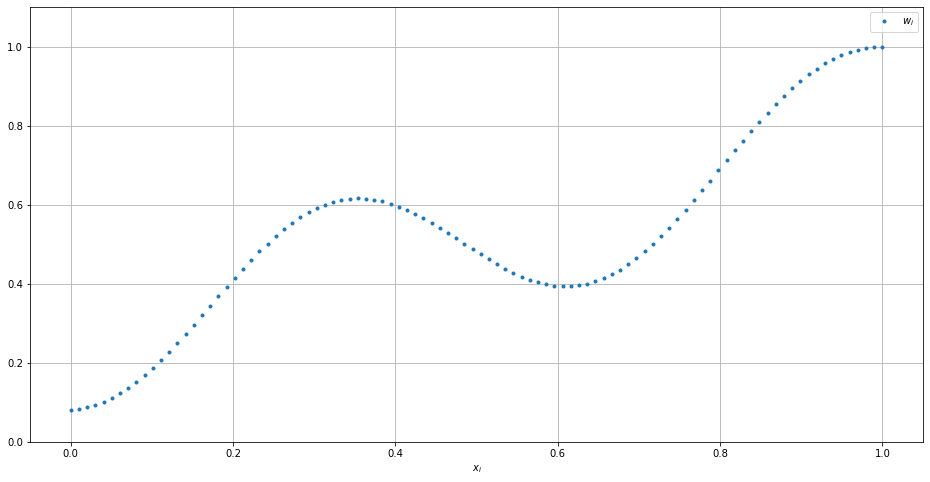

In [10]:
def build_DF(M):
    # First derivative - Forward difference differentiation matrix
    DF  = toeplitz(np.append(np.array([-1]), np.zeros(M-1)), np.append(np.array([0,1]), np.zeros(M-2)))
    return DF

def build_A_hat_and_b_hat(b,c,f,h,x,y1,N):
    DF = build_DF(N-1)
    x_interior = x[:-1]
    A_hat_N=(1/(h))*np.dot(np.diag(b(x_interior)),DF)+np.diag(c(x_interior))
    b_hat_N = f(x_interior)
    b_hat_N[-1] = b_hat_N[-1]-(b(x_interior[-1])/(h))*y1
    return A_hat_N, b_hat_N

A_hat_N, b_hat_N = build_A_hat_and_b_hat(b,c,f,h,x,y1,N)
w = np.linalg.solve(A_hat_N, b_hat_N)
w = np.append(w,y1)

plt.figure(figsize=(16,8))
plt.plot(x,w,'.',label=r'$w_i$')
plt.xlabel(r'$x_i$')
plt.grid(True)
plt.legend(loc='best')
plt.ylim([0,1.1])
plt.show()

### SM

In this case the BVP becomes:
\begin{align*}
    b(x)\,y'(x)+c(x)\,y(x) & = f(x), \quad \text{para $x\in]0,1[$}\\
    y(1)    & = y_1.
\end{align*}

This ode can be easily transform in an IVP as follows,
\begin{align*}
    \dot{y} &= \dfrac{f(t)-c(t)\,y}{b(t)},\\
    y(0)    &= \alpha.
\end{align*}
Notice that we used $\alpha$ since we don't know the initial condition, we only know a final condition, i.e. $y(1)=y_1$.

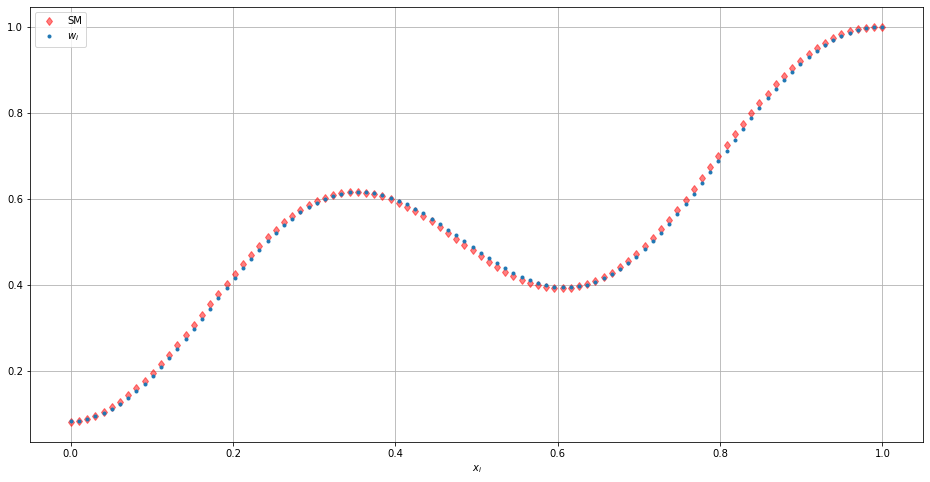

In [11]:
# RHS of IVP
def my_f2(t,w,b,c,f):
    return (f(t)-c(t)*w)/b(t)

# Function to be used to apply the Shooting Method
def F_SM_2(alpha,b,c,f,y1,N):
    sol = solve_ivp(my_f2,(0,1),alpha,t_eval=np.linspace(0,1,N),args=(b,c,f))
    return sol.y[0][-1]-y1

F_root_2 = lambda alpha: F_SM_2(alpha,b,c,f,y1,N)
# Notice that the initial guess for ther root must be choose wisely
alpha_r = root(F_root_2, 1).x[0]

sol = solve_ivp(my_f2,(0,1),(alpha_r,),t_eval=np.linspace(0,1,N),args=(b,c,f))

plt.figure(figsize=(16,8))
plt.plot(sol.t,sol.y[0,:],'rd',label='SM',alpha=0.5)
plt.plot(x,w,'.',label=r'$w_i$')
plt.legend(loc='best')
plt.xlabel(r'$x_i$')
plt.grid(True)
plt.show()

Notice that in this particular case the solution for the case when $a\neq 0$ and $a=0$ are close to each other, but they are not the same.
In particular, the value at $x=0$ is different.

<div id='example2s' />

# Solution Example 2
[Back to toc](#toc)

Considere el siguiente BVP:
\begin{align*}
    y''(x)+3\,\exp(y(x)) & = 0, \quad \text{para $x \in]0,1[$}\\
    y(0) &= 0,\\
    y(1) &= 0,\\
\end{align*}
donde $x\in[0,1]$. Note que $y(x)=0$ no es una solución.
1. Construya un algoritmo basado en diferencias finitas que obtenga la aproximación numérica $y(x)$ considerando como _initial guess_ $y_0(x)$. Utilice el método de Newton con GMRes para resolver el sistema de ecuaciones no-lineales asociado o el módulo _newton_krylov_ de _scipy_, en este último caso no es necesario implementar build_jacobian_matrix_FD.
2. Construya un algoritmo basado en el método del disparo que obtenga la aproximación numérica $y(x)$ considerando como _initial guess_ $y_0(x)$.
3. Resuelva con el algoritmo basado en diferencias finitas el BVP con $y_0(x)=0$ con N=20.
4. Resuelva con el algoritmo basado en el método del disparo el BVP con $y_0(x)=0$ con N=20.
5. ¿Obtiene aproximadamente la misma aproximación numérica en la pregunta 3 y 4?
6. Considere la siguiente familia de _initial guesses_ $y_0^{[m]}(x)=m\,(x-x^2)$, para $m\in\{-10,-9,\dots,10\}$ y N=20.
    1. Resuelva con el algoritmo basado en diferencias finitas el BVP con cada $y_0^{[m]}(x)$.
    2. Resuelva con el algoritmo basado en el método del disparo el BVP con cada $y_0^{[m]}(x)$.
    3. ¿Se obtinen las mismas soluciones en cada caso?
    4. ¿Cuantas soluciones distintas se obtienen?

## FD

In this case we will re-use $D_2$ from the previous analysis, so the discrete equation becomes:
The discrete equation at $x_i$ is the following:
\begin{equation*}
    \dfrac{1}{h^2} \left(w_{i+1}-2\,w_i+w_{i-1}\right)
    +3\,\,\exp(w_i)
    =
    0.
\end{equation*}
There are two special cases, for $x_1$ and $x_{N-2}$, they generate the following equations:
\begin{align*}
    \dfrac{1}{h^2} \left(w_{2}-2\,w_{1}+w_0\right)
    +3\,\,\exp(w_1)
    &=
    0.\\
    \dfrac{1}{h^2} \left(w_{N-1}-2\,w_{N-2}+w_{N-3}\right)
    +3\,\,\exp(w_{N-2})
    &=
    0.
\end{align*}
But, since we know $w_0$ and $w_{N-1}$, they become,
\begin{align*}
    \dfrac{1}{h^2} \left(w_{2}-2\,w_{1}\right)
    +3\,\,\exp(w_1)
    &=
    -\dfrac{1}{h^2}\,w_0.\\
    \dfrac{1}{h^2} \left(-2\,w_{N-2}+w_{N-3}\right)
    +3\,\,\exp(w_{N-2})
    &=
    -\dfrac{1}{h^2}\,w_{N-1}.
\end{align*}
This analysis allows us to write the discrete equation in the following way for the unknown vector $\mathbf{w}=[w_1,w_2,\dots,w_{N-2}]$ and $\mathbf{x}=[x_1,x_2,\dots,x_{N-2}]$:
\begin{equation*}
    \dfrac{1}{h^2}\,D_2\,\mathbf{w}
    +
    3\,\begin{bmatrix}
        \exp(w_1)\\
        \exp(w_2)\\
        \vdots\\
        \exp(w_{N-3})\\
        \exp(w_{N-2})
    \end{bmatrix}
    =
    \begin{bmatrix}
        -\dfrac{1}{h^2}\,w_0\\
        0\\
        \vdots\\
        0\\
        -\dfrac{1}{h^2}\,w_{N-1}
    \end{bmatrix},
\end{equation*}
but since $w_0=0$ and $w_{N-1}=0$ we get,
\begin{equation*}
    \dfrac{1}{h^2}\,D_2\,\mathbf{w}
    +
    3\,\begin{bmatrix}
        \exp(w_1)\\
        \exp(w_2)\\
        \vdots\\
        \exp(w_{N-3})\\
        \exp(w_{N-2})
    \end{bmatrix}
    =
    \begin{bmatrix}
        0\\
        0\\
        \vdots\\
        0\\
        0
    \end{bmatrix},
\end{equation*}
In this case we can't factor out the unknown vector $\mathbf{w}$ since it is not a linear problem.
We need to ask for help to _Sir Isaac Newton_ and to _Professor Aleksey Nikolaevich Krylov_!
For simplicity we will build $\mathbf{F}(\mathbf{w})$, i.e. the high dimensional function that we need to find the root.
\begin{equation*}
    \mathbf{F}(\mathbf{w})=\dfrac{1}{h^2}\,D_2\,\mathbf{w}
    +
    3\,\begin{bmatrix}
        \exp(w_1)\\
        \exp(w_2)\\
        \vdots\\
        \exp(w_{N-3})\\
        \exp(w_{N-2})
    \end{bmatrix}
\end{equation*}
To solve this equation we will use _newton_krylov_!

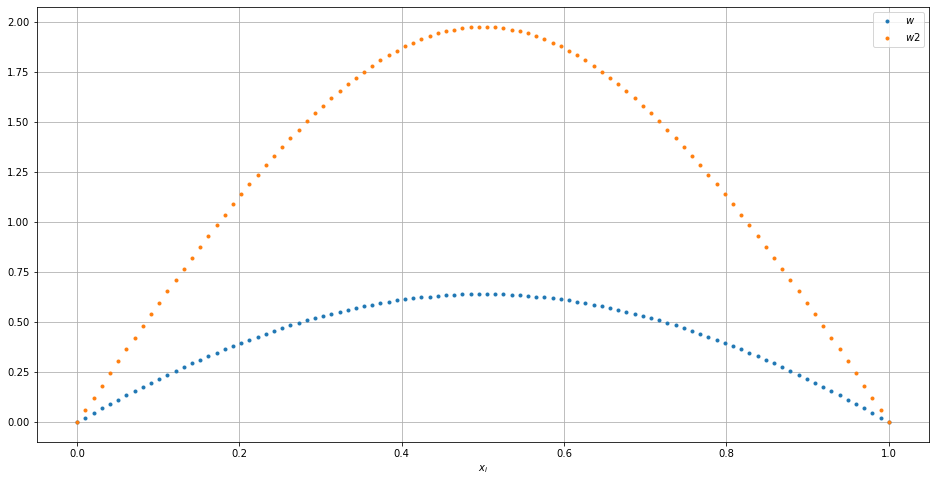

In [12]:
N = 100
x = np.linspace(0,1,N)
h = 1/(N-1)
_, D2 = build_D_D2(N-2)
def F(w):
    return np.dot(D2,w)/(h**2)+3*np.exp(w)

w0 = lambda m: m*(x[1:-1]-np.power(x[1:-1],2))
# First solution
w = newton_krylov(F,w0(0))
w = np.append(0,w)
w = np.append(w,0)

# First solution, notice that the initial guess is different
w2 = newton_krylov(F,w0(8))
w2 = np.append(0,w2)
w2 = np.append(w2,0)

plt.figure(figsize=(16,8))
plt.plot(x,w,'.',label=r'$w$')
plt.plot(x,w2,'.',label=r'$w2$')
plt.legend(loc='best')
plt.xlabel(r'$x_i$')
plt.grid(True)
plt.show()

### SM

Considere el siguiente BVP:
\begin{align*}
    y''(x)+3\,\exp(y(x)) & = 0, \quad \text{para $x \in]0,1[$}\\
    y(0) &= 0,\\
    y(1) &= 0,\\
\end{align*}
donde $x\in[0,1]$. Note que $y(x)=0$ no es una solución.

We first need to rewrite the BVP as a dynamical system and consider $x\rightarrow t$:
\begin{align*}
    w_1(t) &= y(t),\\
    w_2(t) &= y'(t),\\
\end{align*}
so,
\begin{align*}
    \dot{w}_1 &= y'(t) = w_2,\\
    \dot{w}_2(t) &= y''(t)\\
                 &= -3\,\exp(y(t)) = -3\,\exp(w_1),\\
    w_1(0)   &= 0,\\
    w_2(0)   &= \alpha.
\end{align*}

Notice that in this case the only degree of freedom we have is how we initilize $\alpha$ when we look for the root. In particular the way we can use $y_0^{[m]}(x)=m\,(x-x^2)$ is by computing its slope at $x=0$, this will help us to define a convenient initial guess for $\alpha$.

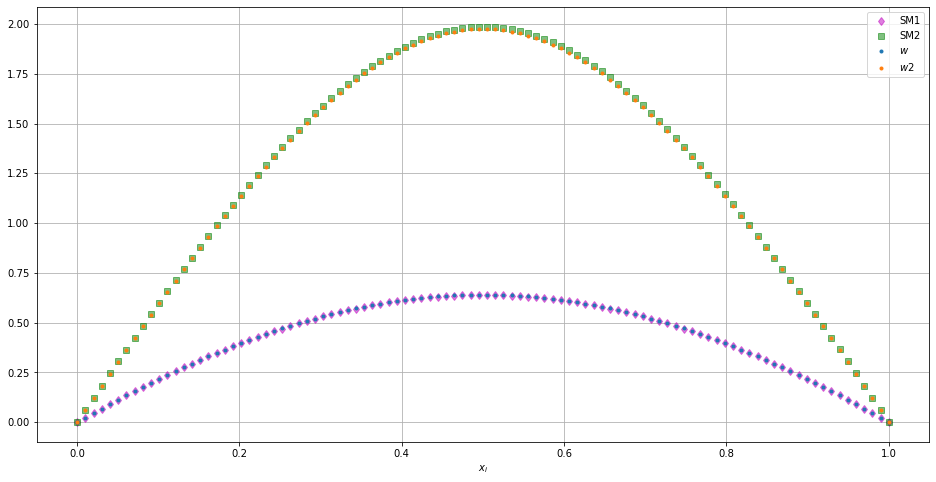

In [13]:
# RHS of dynamical system
def my_f_NL(t,w):
    w1 = w[0]
    w2 = w[1]
    w1dot = w2
    w2dot = -3*np.exp(w1)
    return np.array([w1dot,w2dot])

# Function to be used to apply the Shooting Method
def F_SM_NL(alpha,N):
    initial_condition = np.zeros(2)
    initial_condition[1] = alpha
    sol = solve_ivp(my_f_NL,(0,1),initial_condition,t_eval=np.linspace(0,1,N))
    return sol.y[0,-1]

F_root_NL = lambda alpha: F_SM_NL(alpha,N)
# First solution with initial guess for alpha=0
alpha_r = root(F_root_NL, 0.).x[0]
sol = solve_ivp(my_f_NL,(0,1),np.array([0,alpha_r]),t_eval=np.linspace(0,1,N))

# Second solution with initial guess for alpha=8
alpha_r = root(F_root_NL, 8).x[0]
sol2 = solve_ivp(my_f_NL,(0,1),np.array([0,alpha_r]),t_eval=np.linspace(0,1,N))

plt.figure(figsize=(16,8))
plt.plot(sol.t,sol.y[0,:],'md',label='SM1',alpha=0.5)
plt.plot(sol2.t,sol2.y[0,:],'gs',label='SM2',alpha=0.5)
plt.plot(x,w,'.',label=r'$w$')
plt.plot(x,w2,'.',label=r'$w2$')
plt.legend(loc='best')
plt.xlabel(r'$x_i$')
plt.grid(True)
plt.show()

<div id='acknowledgements' />

# Acknowledgements
[Back to toc](#toc)

* _Material originally created by professor Claudio Torres_ (`ctorres@inf.utfsm.cl`) _. DI UTFSM. July 2021._
* _Update July 2021 - v1.01 - C.Torres_ : Adding algorithms to compute numerical approximations.